## Q2.
### A.
### i.

In [1]:
# File name
# NDM_Assignment2.mat 

# Importing the required libraries
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the .mat file
data = scipy.io.loadmat('NDM_Assignment2.mat')['NDM_Assignment2']

# mat_data.keys()
# dict_keys(['__header__', '__version__', '__globals__', 'NDM_Assignment2'])

c1 = data[:, 0]
c2 = data[:, 1]

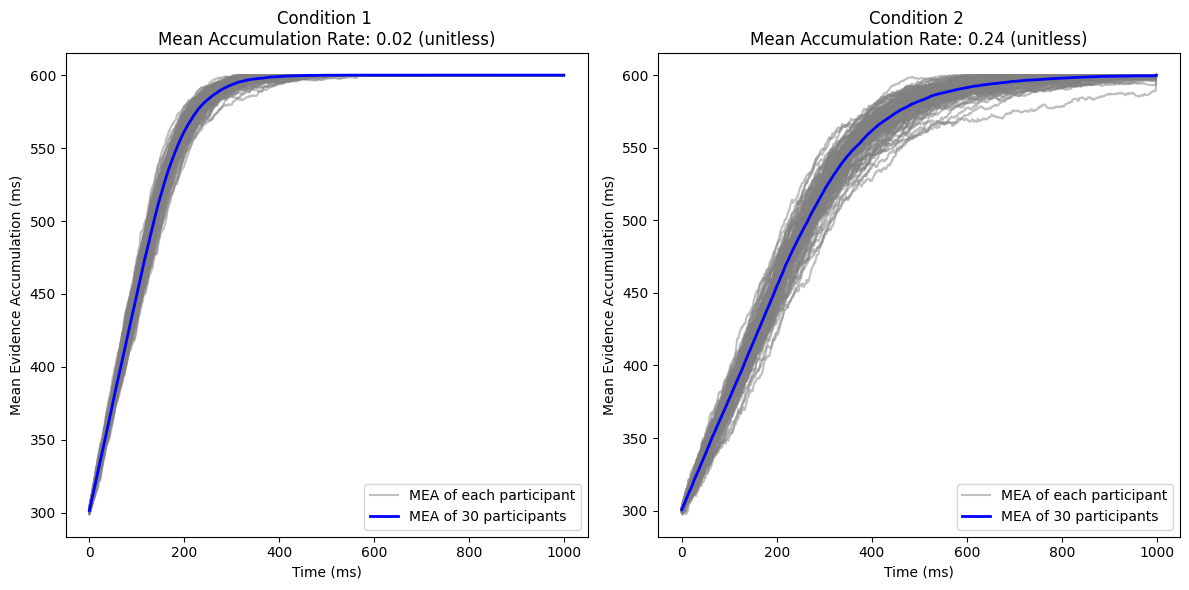

In [42]:
# Create a figure with two subplots
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot condition 1
c1Mean = np.mean(c1, axis=0)
totalc1Mean = np.mean(c1Mean, axis=0)

# Plot the mean of each participant's trials in grey
line1 = plt1.plot(c1Mean.T, color='grey', alpha=0.5, label='MEA of each participant')

# Plot the mean evidence accumulation of the 30 participants in blue
line2 = plt1.plot(totalc1Mean, color='blue', linewidth=2, label='MEA of 30 participants')

# Labels for the plot
handles = [line1[0], line2[0]]
labels = [
    'MEA of each participant',
    'MEA of 30 participants',
]

# Add labels to the plot
title1 = f'Condition 1 \nMean Accumulation Rate: {mean_rate_condition1:.2f} (unitless)'
plt1.set_title(title1)
plt1.set_xlabel('Time (ms)')
plt1.set_ylabel('Mean Evidence Accumulation (ms)')
plt1.legend(handles=handles, labels=labels, loc='lower right')

# Plot condition 2
c2Mean = np.mean(c2, axis=0)
totalc2Mean = np.mean(c2Mean, axis=0)

# Plot the mean of each participant's trials in grey
line1 = plt2.plot(c2Mean.T, color='grey', alpha=0.5, label='MEA of each participant')

# Plot the mean evidence accumulation of the 30 participants in blue
line2 = plt2.plot(totalc2Mean, color='blue', linewidth=2, label='MEA of 30 participants')

# Labels for the plot
handles = [line1[0], line2[0]]
labels = [
    'MEA of each participant',
    'MEA of 30 participants',
]

# Add labels to the plot
title2 = f'Condition 2 \nMean Accumulation Rate: {mean_rate_condition2:.2f} (unitless)'
plt2.set_title(title2)
plt2.set_xlabel('Time (ms)')
plt2.set_ylabel('Mean Evidence Accumulation (ms)')
plt2.legend(handles=handles, labels=labels, loc='lower right')

plt.tight_layout()
plt.show()


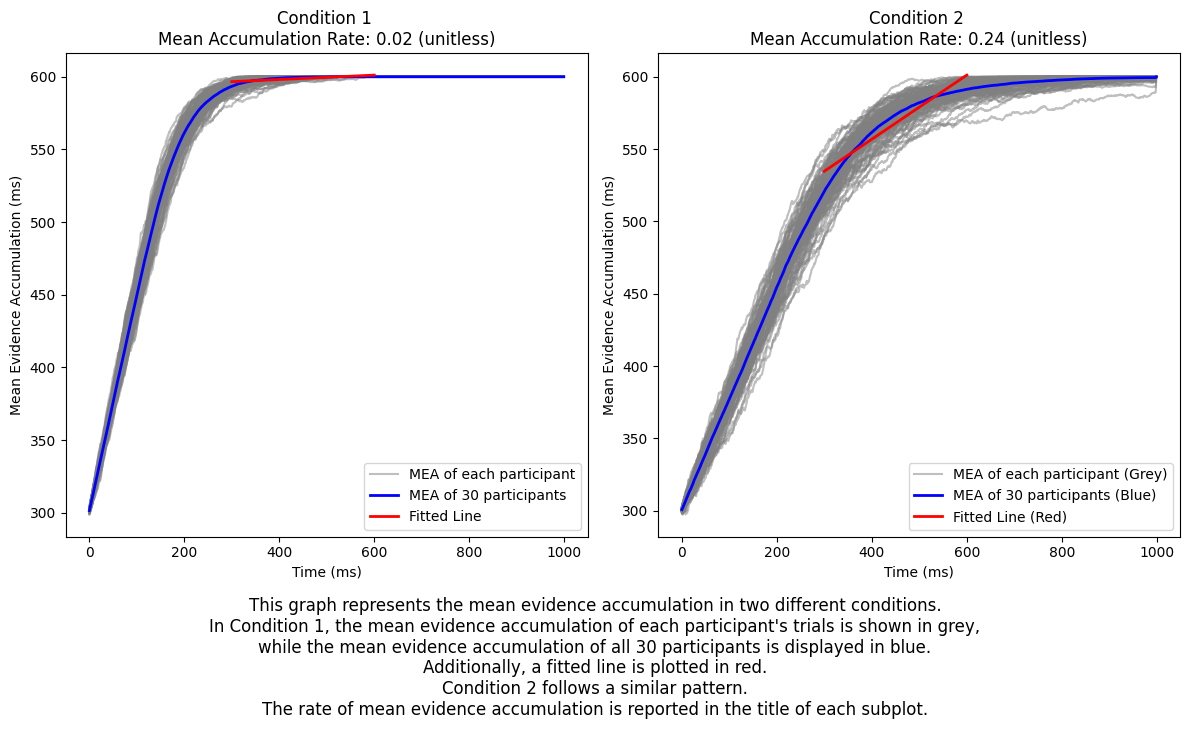

In [43]:
# Create a figure with two subplots
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot condition 1
c1Mean = np.mean(c1, axis=0)
totalc1Mean = np.mean(c1Mean, axis=0)

# Plot the mean of each participant's trials in grey
line1 = plt1.plot(c1Mean.T, color='grey', alpha=0.5, label='MEA of each participant')

# Plot the mean evidence accumulation of the 30 participants in blue
line2 = plt1.plot(totalc1Mean, color='blue', linewidth=2, label='MEA of 30 participants')

fit_x = np.arange(300, 601)
fit_y = np.polyfit(np.arange(300, 601), totalc1Mean[300:601], 1)[0] * fit_x + np.polyfit(np.arange(300, 601), totalc1Mean[300:601], 1)[1]

# Calculate the rate of mean evidence accumulation for condition 1
mean_rate_condition1 = (totalc1Mean[600] - totalc1Mean[300]) / (fit_x[-1] - fit_x[0])
line3 = plt1.plot(fit_x, fit_y, color='red', linewidth=2, label='Fitted Line')

# Labels for the plot
handles = [line1[0], line2[0], line3[0]]
labels = [
    'MEA of each participant',
    f'MEA of 30 participants',
    'Fitted Line',
]

# Add labels to the plot
title1 = f'Condition 1 \nMean Accumulation Rate: {mean_rate_condition1:.2f} (unitless)'
plt1.set_title(title1)
plt1.set_xlabel('Time (ms)')
plt1.set_ylabel('Mean Evidence Accumulation (ms)')
plt1.legend(handles=handles, labels=labels, loc='lower right')

# Plot condition 2
c2Mean = np.mean(c2, axis=0)
totalc2Mean = np.mean(c2Mean, axis=0)

# Plot the mean of each participant's trials in grey
line1 = plt2.plot(c2Mean.T, color='grey', alpha=0.5, label='MEA of each participant')

# Plot the mean evidence accumulation of the 30 participants in blue
line2 = plt2.plot(totalc2Mean, color='blue', linewidth=2, label='MEA of 30 participants')

fit_x = np.arange(300, 601)
fit_y = np.polyfit(np.arange(300, 601), totalc2Mean[300:601], 1)[0] * fit_x + np.polyfit(np.arange(300, 601), totalc2Mean[300:601], 1)[1]

# Calculate the rate of mean evidence accumulation for condition 2
mean_rate_condition2 = (totalc2Mean[600] - totalc2Mean[300]) / (fit_x[-1] - fit_x[0])
line3 = plt2.plot(fit_x, fit_y, color='red', linewidth=2, label='Fitted Line')

# Define a list of handles and labels with colors to add to the plot
handles = [line1[0], line2[0], line3[0]]
labels = [
    'MEA of each participant (Grey)',
    f'MEA of 30 participants (Blue)',
    'Fitted Line (Red)',
]

# Add labels to the plot
title2 = f'Condition 2 \nMean Accumulation Rate: {mean_rate_condition2:.2f} (unitless)'
plt2.set_title(title2)
plt2.set_xlabel('Time (ms)')
plt2.set_ylabel('Mean Evidence Accumulation (ms)')
plt2.legend(handles=handles, labels=labels, loc='lower right')

common_caption = (
    'This graph represents the mean evidence accumulation in two different conditions.\n'
    'In Condition 1, the mean evidence accumulation of each participant\'s trials is shown in grey,\n'
    'while the mean evidence accumulation of all 30 participants is displayed in blue.\n'
    'Additionally, a fitted line is plotted in red.\n'
    'Condition 2 follows a similar pattern.\n'
    'The rate of mean evidence accumulation is reported in the title of each subplot.'
)
fig.text(0.5, -0.2, common_caption, ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [73]:
import scipy.stats as stats

# Calculate the mean rate of evidence accumulation for each condition
meanRateC1 = (totalc1Mean[600] - totalc1Mean[300]) / (fit_x[-1] - fit_x[0])
meanRateC2 = (totalc2Mean[600] - totalc2Mean[300]) / (fit_x[-1] - fit_x[0])

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(meanRateC1, meanRateC2)

alpha = 0.05 # it is predetermined threshold used to determine the level of statistical significance in hypothesis testing

# Report the results
print(f'Mann-Whitney U Test Results:')
print(f'Statistic: {statistic}')
print(f'p-value: {p_value}')

# Check if the p-value is less than the significance level
if p_value < alpha:
    print(f'Reject the null hypothesis. Since there is a significant difference in the mean rate of evidence accumulation between the two conditions.')
else:
    print(f'Fail to reject the null hypothesis. Since there is no significant difference in the mean rate of evidence accumulation between the two conditions.')

Mann-Whitney U Test Results:
Statistic: 0.0
p-value: 1.0
Fail to reject the null hypothesis. Since there is no significant difference in the mean rate of evidence accumulation between the two conditions.


## B.

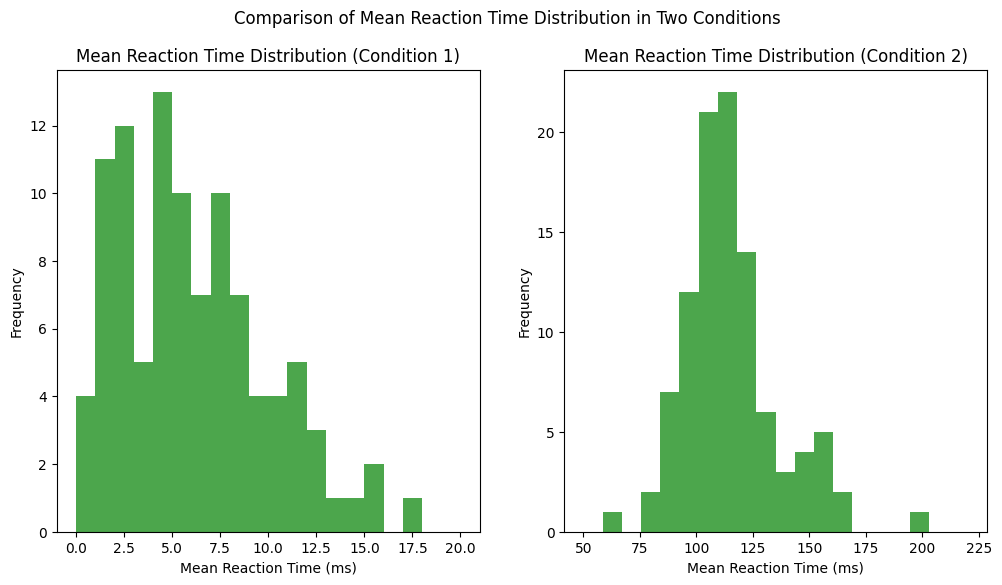

In [72]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the .mat file
data = scipy.io.loadmat('NDM_Assignment2.mat')['NDM_Assignment2']

# Split the data into two conditions
c1 = data[:, 0]
c2 = data[:, 1]

# Create a figure with two subplots
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 6))

# Calculate reaction time (RT) for each trial and participant in both conditions
rt_condition1 = np.zeros((30, 100))
rt_condition2 = np.zeros((30, 100))
threshold = 600  # Decision threshold

for participant in range(30):
    for trial in range(100):
        rt_condition1[participant, trial] = np.argmax(c1[participant][trial][300:] >= threshold)
        rt_condition2[participant, trial] = np.argmax(c2[participant][trial][300:] >= threshold)

# Calculate mean RT for all 30 participants in each condition
mean_rt_condition1 = np.mean(rt_condition1, axis=0)
mean_rt_condition2 = np.mean(rt_condition2, axis=0)

# Plot histograms for Condition 1
plt1.hist(mean_rt_condition1, bins=20, color='green', alpha=0.7, range=(0, 20))
plt1.set_title('Mean Reaction Time Distribution (Condition 1)')
plt1.set_xlabel('Mean Reaction Time (ms)')
plt1.set_ylabel('Frequency')

# Plot histograms for Condition 2
plt2.hist(mean_rt_condition2, bins=20, color='green', alpha=0.7, range=(50, 220))
plt2.set_title('Mean Reaction Time Distribution (Condition 2)')
plt2.set_xlabel('Mean Reaction Time (ms)')
plt2.set_ylabel('Frequency')

# Set a detailed caption for the plot
fig.suptitle('Comparison of Mean Reaction Time Distribution in Two Conditions')
plt.show()


In [ ]:
import scipy.io
import numpy as np
import scipy.stats as stats

# Load the data from the .mat file
data = scipy.io.loadmat('NDM_Assignment2.mat')['NDM_Assignment2']

# Split the data into two conditions
c1 = data[:, 0]
c2 = data[:, 1]

# Calculate the median bias of evidence accumulation for each condition
median_bias_condition1 = np.median(c1, axis=(0, 2))
median_bias_condition2 = np.median(c2, axis=(0, 2))

# Perform an appropriate statistical test (e.g., Mann-Whitney U test) to compare both conditions
stats, p_value = stats.mannwhitneyu(median_bias_condition1, median_bias_condition2)

alpha = 0.05

# Report the results
print(f'Mann-Whitney U Test Results:')
print(f'Statistic: {stats}')
print(f'p-value: {p_value}')

# Check if the p-value is less than the significance level
if p_value < alpha:
    print(f'Reject the null hypothesis. There is a significant difference in median bias between the two conditions.')
else:
    print(f'Fail to reject the null hypothesis. There is no significant difference in median bias between the two conditions.')
